In [1]:
import pandas as pd

df = pd.read_csv('/content/train.csv')#https://archive.ics.uci.edu/dataset/43/haberman+s+survival
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_col = df[["Survived","Sex","Age","Fare","Embarked"]]
df_col

,Survived,Sex,Age,Fare,Embarked
0,0,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,1,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,0,male,35.0,8.0500,S
...,...,...,...,...,...
886,0,male,27.0,13.0000,S
887,1,female,19.0,30.0000,S
888,0,female,NaN,23.4500,S
889,1,male,26.0,30.0000,C


In [5]:
df_col.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


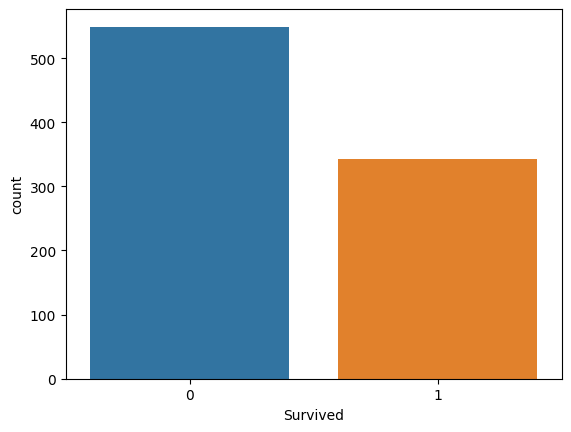

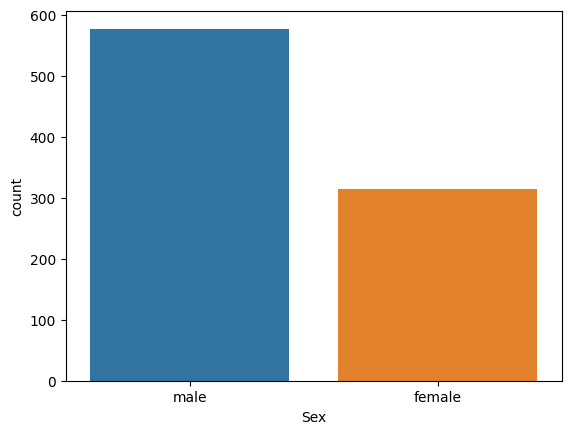

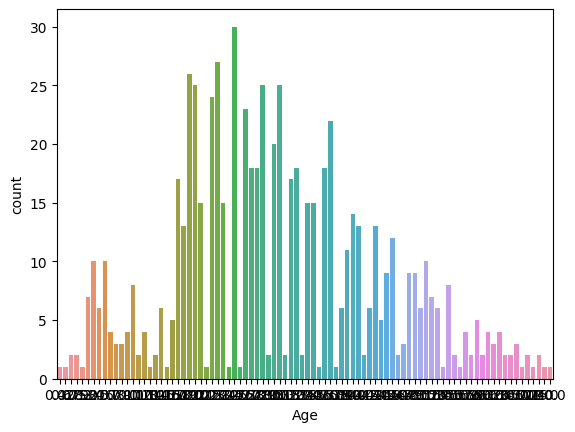

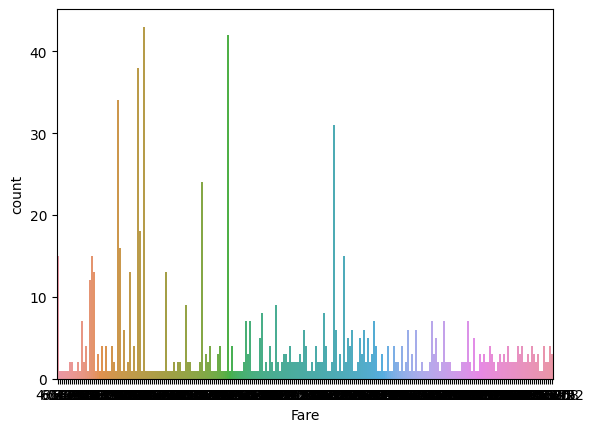

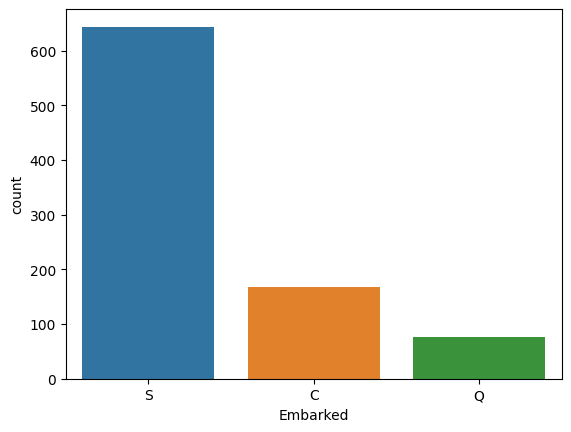

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df_col.columns:
    ax = sns.countplot(x=df_col[i],data=df_col)
    plt.show()

In [9]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 34.9+ KB


In [11]:
df_col.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [12]:
import numpy as np
print(np.mean(df_col['Age']))

29.69911764705882


In [13]:
df_col['Age'] = df_col['Age'].fillna(np.mean(df_col['Age']))

<ipython-input-13-523e217592ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['Age'] = df_col['Age'].fillna(np.mean(df_col['Age']))


In [14]:
df_col.isnull().sum()

Survived    0
Sex         0
Age         0
Fare        0
Embarked    2
dtype: int64

In [15]:
df_col.dropna(subset=['Embarked'],inplace = True)
df_col

<ipython-input-15-6d4f92e390e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col.dropna(subset=['Embarked'],inplace = True)


,Survived,Sex,Age,Fare,Embarked
0,0,male,22.000000,7.2500,S
1,1,female,38.000000,71.2833,C
2,1,female,26.000000,7.9250,S
3,1,female,35.000000,53.1000,S
4,0,male,35.000000,8.0500,S
...,...,...,...,...,...
886,0,male,27.000000,13.0000,S
887,1,female,19.000000,30.0000,S
888,0,female,29.699118,23.4500,S
889,1,male,26.000000,30.0000,C


In [16]:
from sklearn.preprocessing import LabelEncoder
# for i in df.columns:
#   if df[i].dtype == object:
#     df[i] = LabelEncoder().fit_transform(df[i])
# df

lb1 = LabelEncoder()
df_col['Embarked'] = lb1.fit_transform(df_col['Embarked'])
lb2 = LabelEncoder()
df_col['Sex'] = lb2.fit_transform(df_col['Sex'])
df_col

<ipython-input-16-a129827dd0fb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['Embarked'] = lb1.fit_transform(df_col['Embarked'])
<ipython-input-16-a129827dd0fb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['Sex'] = lb2.fit_transform(df_col['Sex'])


,Survived,Sex,Age,Fare,Embarked
0,0,1,22.000000,7.2500,2
1,1,0,38.000000,71.2833,0
2,1,0,26.000000,7.9250,2
3,1,0,35.000000,53.1000,2
4,0,1,35.000000,8.0500,2
...,...,...,...,...,...
886,0,1,27.000000,13.0000,2
887,1,0,19.000000,30.0000,2
888,0,0,29.699118,23.4500,2
889,1,1,26.000000,30.0000,0


In [18]:
df_col.describe()

,Survived,Sex,Age,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,0.649044,29.653446,32.096681,1.535433
std,0.486260,0.477538,12.968366,49.697504,0.792088
min,0.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,7.895800,1.000000
50%,0.000000,1.000000,29.699118,14.454200,2.000000
75%,1.000000,1.000000,35.000000,31.000000,2.000000
max,1.000000,1.000000,80.000000,512.329200,2.000000


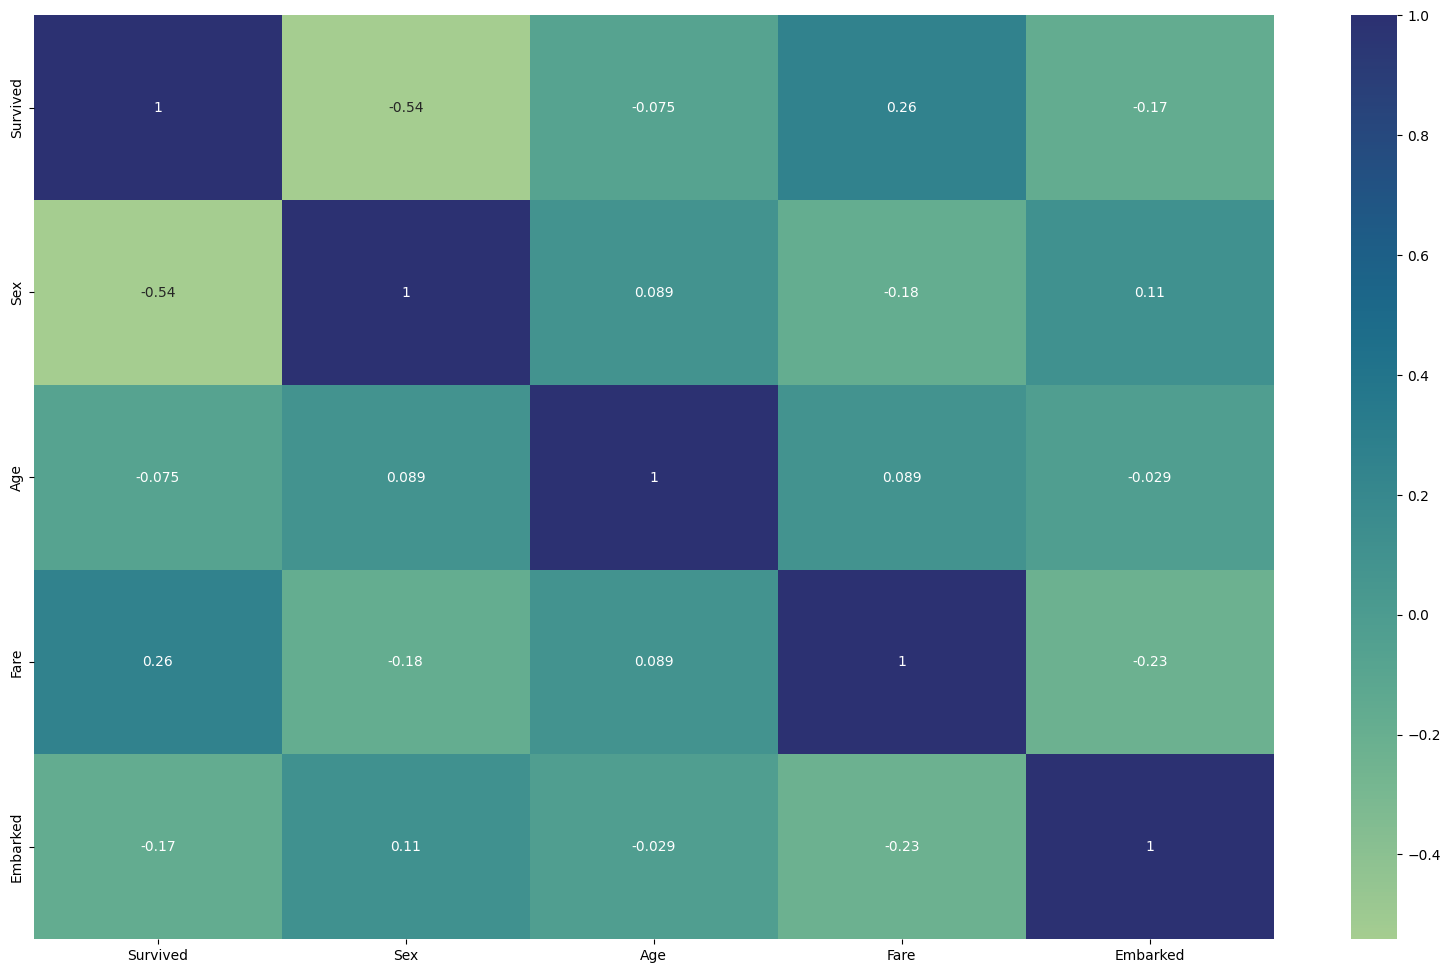

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.heatmap(df_col.corr(), cmap = 'crest', annot = True)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
x = df_col.drop(['Age','Embarked','Survived','Fare'],axis = 1)
y = df_col['Survived']

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size= 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(711, 1)
(711,)
(178, 1)
(178,)


In [25]:
df_col.shape

(889, 5)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = []
for neighbors in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors = neighbors)
    knn_model.fit(x_train, y_train)

    knn_pred = knn_model.predict(x_test)
    accuracy.append(accuracy_score(y_test, knn_pred))
    print(f'Number of neighbors = {neighbors} \tAccuracy = {accuracy[neighbors-1]*100:.2f} %')

Number of neighbors = 1 	Accuracy = 79.78 %
Number of neighbors = 2 	Accuracy = 61.24 %
Number of neighbors = 3 	Accuracy = 79.78 %
Number of neighbors = 4 	Accuracy = 61.24 %
Number of neighbors = 5 	Accuracy = 79.78 %
Number of neighbors = 6 	Accuracy = 61.24 %
Number of neighbors = 7 	Accuracy = 79.78 %
Number of neighbors = 8 	Accuracy = 79.78 %
Number of neighbors = 9 	Accuracy = 79.78 %
Number of neighbors = 10 	Accuracy = 79.78 %
Number of neighbors = 11 	Accuracy = 79.78 %
Number of neighbors = 12 	Accuracy = 79.78 %
Number of neighbors = 13 	Accuracy = 79.78 %
Number of neighbors = 14 	Accuracy = 79.78 %
Number of neighbors = 15 	Accuracy = 79.78 %
Number of neighbors = 16 	Accuracy = 79.78 %
Number of neighbors = 17 	Accuracy = 79.78 %
Number of neighbors = 18 	Accuracy = 79.78 %
Number of neighbors = 19 	Accuracy = 79.78 %
Number of neighbors = 20 	Accuracy = 79.78 %
Number of neighbors = 21 	Accuracy = 79.78 %
Number of neighbors = 22 	Accuracy = 79.78 %
Number of neighbors

In [39]:
clf1 = KNeighborsClassifier(n_neighbors = 7,p=1)#manhattan

In [40]:
print(x_train)

     Sex
708    0
240    0
382    1
792    0
683    1
..   ...
107    1
271    1
862    0
436    0
103    1

[711 rows x 1 columns]


In [41]:
clf1.fit (x_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [42]:
pred1 = clf1.predict(x_test)

In [43]:
cm1 = confusion_matrix(y_test,pred1)

In [44]:
print(cm1)

[[89 20]
 [16 53]]


In [45]:
cl1 = classification_report(y_test,pred1)

In [46]:
print(cl1)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



##  Naive Bayes

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

clf1 = MultinomialNB()
clf2 = BernoulliNB()

In [48]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

BernoulliNB()

In [49]:
pred1 = clf1.predict(x_test)
pred2 = clf2.predict(x_test)

In [50]:
cm1 = confusion_matrix(y_test,pred1)
cr1 = classification_report(y_test,pred1)

cm2 = confusion_matrix(y_test,pred2)
cr2 = classification_report(y_test,pred2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


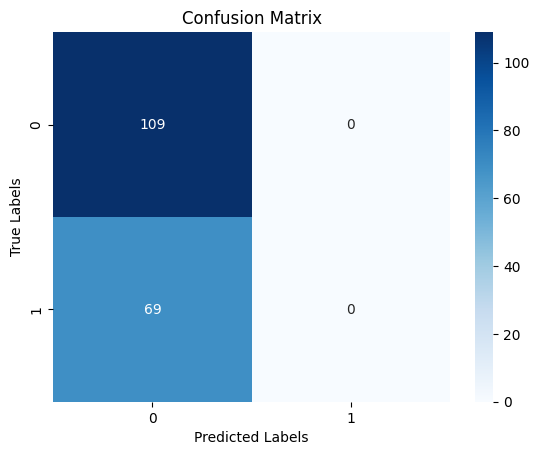

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [52]:
print(cr1)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       109
           1       0.00      0.00      0.00        69

    accuracy                           0.61       178
   macro avg       0.31      0.50      0.38       178
weighted avg       0.37      0.61      0.47       178



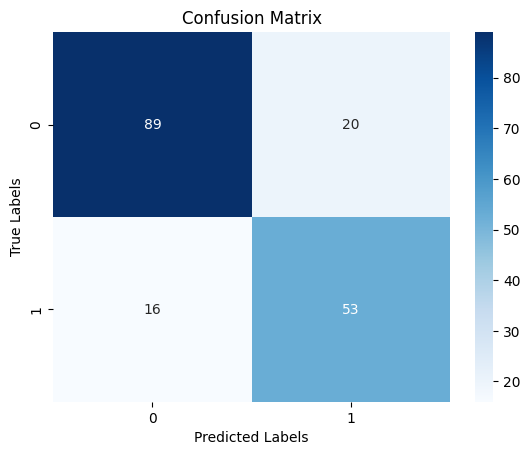

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [54]:
print(cr2)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [55]:
from sklearn.metrics import accuracy_score #works

prior1 = [x/100 for x in range(60,150,5)]
prior2 = [x/100 for x in range(60,150,5)]
best_accuracy = 0.0

best_val1 = None
best_val2 = None

for val2 in prior2:
    for val1 in prior1:
        clf = BernoulliNB(class_prior=[val1, val2])
        clf.fit(x_train, y_train)

        y_pred = clf.predict(x_test)

        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_val1 = val1
            best_val2 = val2

print("Best Accuracy:", best_accuracy)
print("Best val1:", best_val1)
print("Best val2:", best_val2)

Best Accuracy: 0.797752808988764
Best val1: 0.6
Best val2: 0.6


In [56]:
clf3 = MultinomialNB(class_prior = [1,1.2])
clf4 = BernoulliNB(class_prior = [1,1.2])

In [57]:
clf3.fit(x_train,y_train)
clf4.fit(x_train,y_train)

pred3 = clf3.predict(x_test)
pred4 = clf4.predict(x_test)

cm3 = confusion_matrix(y_test,pred3)
cr3 = classification_report(y_test,pred3)

cm4 = confusion_matrix(y_test,pred4)
cr4 = classification_report(y_test,pred4)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print(cr3)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.39      1.00      0.56        69

    accuracy                           0.39       178
   macro avg       0.19      0.50      0.28       178
weighted avg       0.15      0.39      0.22       178



In [59]:
print(cr4)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



## SVM Model

In [60]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [x/100 for x in range(10,200,5)],
    'max_iter': [x for x in range(1000,5000,1000)],
    'penalty': ['l1','l2']
    #random_state : [x for x in range(1,100)]
}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
760 fits failed out of a total of 1520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, pena

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.79775281 0.76966292 0.79775281 0.78089888 0.78531073]
Mean score: 0.7862756300387227


## Decision Tree

In [63]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [64]:
# use the model to make predictions with the test data
y_pred = dtree.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))



Misclassified samples: 36
Accuracy: 0.80


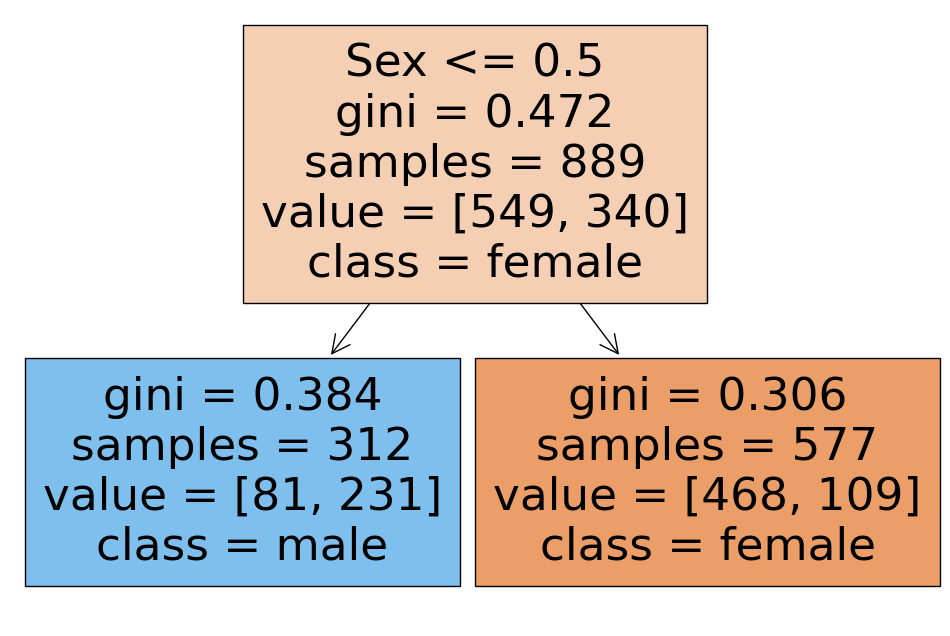

In [68]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming you have your data in 'x' (features) and 'y' (target/labels)

# Create an instance of the DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(x, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=x.columns, class_names=[str(x) for x in list(lb2.classes_)], filled=True)
plt.show()
